# Brief Description

The purpose of this project was to analyse global income inequality. Income inequality is a phenomenon that occurs when there is an uneven distribution of income throughout a population. According to a United Nations report in 2020 income inequality has been on the rise and has been affecting more than two-thirds of the globe. This project dived into viewing the disparity between the top 1% and the bottom 50% of income earners and did a regression to determine if a relationship exists between the dependent variable of income inequality, measured by the Gini Coefficient, and the independent variables of the unemployment rate, government spending on education (% of GDP), gender inequality and corruption. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline
sns.set()
sns.set_style('white')
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':100})
pd.options.display.float_format = '{:,.2f}'.format

# Importing Data, Data Cleaning and Data Exploration

In [2]:
#importing the GINI coefficient csv file
df_gini_coeff = pd.read_csv('csvData_Gini_per_country.csv')
df_gini_coeff.head()

,Country,Gini Coefficient
0,South Africa,63.00
1,Namibia,59.10
2,Suriname,57.90
3,Zambia,57.10
4,Sao Tome and Principe,56.30


WHAT IS THE GINI COEFFICIENT?

The GINI coefficient is an index that measures the distribution of income across a population. The coefficient ranges from 0 (or 0%) to 1 (or 100%), with zero representing perfect equality and one representing perfect inequality.


In [3]:
#checking on data type
print(df_gini_coeff.dtypes)

Country              object
Gini Coefficient    float64
dtype: object


In [4]:
#Checking for any missing values
df_gini_coeff.isnull().sum() #no missing values from the result

Country             0
Gini Coefficient    0
dtype: int64

In [5]:
#importing unemployment rate csv file
df_unemployment_rate = pd.read_csv('API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_3731354_unemployment_rate.csv')
df_unemployment_rate.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.75,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.55,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33


In [6]:
#from the umployment data set I only need the 2020 values from the available countries
df_unemployment_rate_2 = df_unemployment_rate[['Country Name', '2020']]
df_unemployment_rate_2.head()

,Country Name,2020
0,Aruba,NaN
1,Africa Eastern and Southern,7.56
2,Afghanistan,11.71
3,Africa Western and Central,6.77
4,Angola,8.33


In [7]:
# checking for null values
df_unemployment_rate_2.isnull().sum() # there are 31 null values present in the data set

Country Name     0
2020            31
dtype: int64

In [8]:

df_unemployment_rate_cleaned = df_unemployment_rate_2.dropna().rename(columns= {'Country Name': 'Country', 
                                                                                '2020': 'Unemployment Rate'})
df_unemployment_rate_cleaned.head()

,Country,Unemployment Rate
1,Africa Eastern and Southern,7.56
2,Afghanistan,11.71
3,Africa Western and Central,6.77
4,Angola,8.33
5,Albania,13.33


In [9]:
#double checking if null values were dropped
df_unemployment_rate_cleaned.isnull().sum() #all null values dropped

#this data set is including a combination of continents and countries all continents will be dropped
# when I do an inner join with the gini dataframe

Country              0
Unemployment Rate    0
dtype: int64

In [10]:
#importing govt spending on education csv file
df_govt_spend_on_edu = pd.read_csv('Spending on education as a percentage of GDP.csv', skiprows=4)
df_govt_spend_on_edu.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.12,6.55,6.44,5.85,5.89,5.49,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.39,5.51,4.62,4.92,5.08,4.88,5.02,4.95,4.72,NaN
2,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.46,NaN,3.45,3.70,3.26,3.51,3.37,3.20,3.21,NaN
3,Africa Western and Central,AFW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.99,3.01,3.03,3.16,3.12,2.83,3.43,3.07,3.03,NaN
4,Angola,AGO,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.24,3.28,3.87,2.93,3.49,2.75,2.47,2.04,1.82,NaN


In [11]:
#from the data set will be taking the country name column and the 2018 column
df_govt_spend_on_edu_2 = df_govt_spend_on_edu[['Country Name', '2018']]
df_govt_spend_on_edu_2.head()

,Country Name,2018
0,Aruba,NaN
1,Africa Eastern and Southern,4.95
2,Afghanistan,3.20
3,Africa Western and Central,3.07
4,Angola,2.04


In [12]:
#checking for null values
df_govt_spend_on_edu_2.isnull().sum() # there are 76 null values present in the data set

Country Name     0
2018            76
dtype: int64

In [13]:
#dropping records with null values
df_govt_spend_on_edu_cleaned = df_govt_spend_on_edu_2.dropna().rename(columns= {'Country Name': 'Country', 
                                                                                '2018': 'Govt Spend on Education (% of GDP)'})
df_govt_spend_on_edu_cleaned.head()

#same thing with the umemployment data set contients and countries are mixed together, and continents will be removed when 
# I do an inner join

,Country,Govt Spend on Education (% of GDP)
1,Africa Eastern and Southern,4.95
2,Afghanistan,3.20
3,Africa Western and Central,3.07
4,Angola,2.04
6,Andorra,3.25


In [14]:
# importing bottom 50% share of income csv file
df_bottom_50per_share_income_country = pd.read_csv('Bottom 50 percent share of income.csv', encoding='latin1')
df_bottom_50per_share_income_country.head()

,Country,Bottom 50% share of income
0,South Africa,0.05
1,Namibia,0.07
2,Zambia,0.07
3,Central African Republic,0.08
4,Swaziland,0.08


In [15]:
#checking for null values
df_bottom_50per_share_income_country.isnull().sum()  #no null values

Country                       0
Bottom 50% share of income    0
dtype: int64

In [16]:
#Importing corruption perception index csv file
df_cpi_per_country = pd.read_csv('CPI per Country 2020.csv', encoding='latin1')
df_cpi_per_country.head()

,Country,CPI Score,CPI Rank
0,Denmark,88,1
1,New Zealand,88,1
2,Finland,85,3
3,Singapore,85,3
4,Sweden,85,3


In [17]:
#checking for null values
df_cpi_per_country.isnull().sum() #no missing values

Country      0
CPI Score    0
CPI Rank     0
dtype: int64

WHAT IS CORRUPTION PERCEPTION INDEX

Is an index which ranks countries by their perceived levels of public sector corruption. 

Scores range from 0 to 100, with zero indicating high levels of corruption and 100 indicating low levels. 

The CPI is published annually by Transparency International, an organization that seeks to stop bribery, fraud, and other forms of public sector corruption.

In [18]:
#Importing the gender gap index csv file
df_gender_gap_index = pd.read_csv('Gender Gap index 2020.csv', encoding='latin1')
df_gender_gap_index.head()

,Gender Gap Rank,Country,Gender Gap Score (0-1)
0,1,Iceland,0.88
1,2,Norway,0.84
2,3,Finland,0.83
3,4,Sweden,0.82
4,5,Nicaragua,0.80


In [19]:
#checking on data types
df_gender_gap_index.dtypes

Gender Gap Rank             int64
Country                    object
Gender Gap Score (0-1)    float64
dtype: object

In [20]:
#checkeing for null values 
df_gender_gap_index.isnull().sum() # no null values

Gender Gap Rank           0
Country                   0
Gender Gap Score (0-1)    0
dtype: int64

In [21]:
#rearranging columns
df_gender_gap_index = df_gender_gap_index[['Country', 'Gender Gap Score (0-1)', 'Gender Gap Rank']]
df_gender_gap_index.head()

,Country,Gender Gap Score (0-1),Gender Gap Rank
0,Iceland,0.88,1
1,Norway,0.84,2
2,Finland,0.83,3
3,Sweden,0.82,4
4,Nicaragua,0.80,5


WHAT IS THE GENDER GAP INDEX

The index quantifies the gaps between women and men in four key areas of health, education, economy, and politics.

Countries are given a score from 0-1. A score of 1 indicates full equality between women and men and a score of 0 indicates full inequality.

In [22]:
#importing top 1% share of income by country 
df_top_1per_share_income_country = pd.read_csv('Top 1% share of income.csv', encoding='latin1')
df_top_1per_share_income_country.head()

,Country,Top 1% share of income
0,Switzerland,0.11
1,Uruguay,0.15
2,Syrian Arab Republic,0.21
3,Guinea,0.13
4,Malawi,0.28


In [23]:
#checking for null values 
df_top_1per_share_income_country.isnull().sum() # no null values

Country                   0
Top 1% share of income    0
dtype: int64

In [24]:
#importing bottom 50% of income share per region
df_bottom_50per_share_income_region = pd.read_csv('Region bottom 50% share of income.csv')
df_bottom_50per_share_income_region

,Region,Bottom 50% share of income
0,Africa,0.09
1,Asia,0.10
2,Latin America,0.10
3,Europe,0.19
4,Oceania,0.12
5,North America,0.13
6,Middle East,0.09


In [25]:
#importing top 1% of income share per region
df_top_1per_share_income_region = pd.read_csv('Region top 1% share of income.csv')
df_top_1per_share_income_region

,Region,Top 1% share of income
0,Africa,0.20
1,Asia,0.19
2,Latin America,0.24
3,Europe,0.12
4,Oceania,0.14
5,North America,0.19
6,Middle East,0.23


In [26]:
#joining dataframes together
df_main = pd.merge(left = df_gini_coeff, 
                   right = df_bottom_50per_share_income_country, 
                   left_on = 'Country', 
                   right_on = 'Country')

df_main_2 =pd.merge(left = df_main,
                   right = df_top_1per_share_income_country,
                   left_on = 'Country',
                   right_on = 'Country')

df_main_3 = pd.merge(left = df_main_2,
                    right = df_gender_gap_index,
                    left_on = 'Country',
                    right_on = 'Country')

df_main_4 = pd.merge(left = df_main_3,
                    right = df_cpi_per_country,
                    left_on = 'Country',
                    right_on = 'Country')

df_main_5 = pd.merge(left = df_main_4,
                    right = df_unemployment_rate_cleaned,
                    left_on = 'Country',
                    right_on = 'Country')

df_main_final = pd.merge(left = df_main_5,
                        right = df_govt_spend_on_edu_cleaned,
                        left_on = 'Country',
                        right_on = 'Country')

In [27]:
df_main_final.head()

,Country,Gini Coefficient,Bottom 50% share of income,Top 1% share of income,Gender Gap Score (0-1),Gender Gap Rank,CPI Score,CPI Rank,Unemployment Rate,Govt Spend on Education (% of GDP)
0,South Africa,63.00,0.05,0.22,0.78,17,44,69,29.22,6.16
1,Namibia,59.10,0.07,0.22,0.78,12,51,57,21.45,8.99
2,Suriname,57.90,0.13,0.20,0.71,77,38,94,9.78,5.69
3,Zambia,57.10,0.07,0.23,0.73,45,33,117,12.85,4.74
4,Mozambique,54.00,0.08,0.31,0.72,56,25,149,3.81,5.45


In [28]:
#Summary Statistics
print(df_gini_coeff.describe())
print('_______________________________')
print(df_bottom_50per_share_income_country.describe())
print('_______________________________')
print(df_bottom_50per_share_income_region.describe())
print('_______________________________')
print(df_top_1per_share_income_country.describe())
print('_______________________________')
print(df_top_1per_share_income_region.describe())
print('_______________________________')
print(df_gender_gap_index.describe())
print('_______________________________')
print(df_cpi_per_country.describe())
print('_______________________________')
print(df_unemployment_rate_cleaned.describe())
print('_______________________________')
print(df_govt_spend_on_edu_cleaned.describe())

       Gini Coefficient
count            163.00
mean              38.20
std                7.83
min               24.60
25%               32.80
50%               36.80
75%               42.45
max               63.00
_______________________________
       Bottom 50% share of income
count                      179.00
mean                         0.15
std                          0.04
min                          0.05
25%                          0.12
50%                          0.15
75%                          0.18
max                          0.25
_______________________________
       Bottom 50% share of income
count                        7.00
mean                         0.12
std                          0.04
min                          0.09
25%                          0.09
50%                          0.10
75%                          0.13
max                          0.19
_______________________________
       Top 1% share of income
count                  177.00
mean            

# EDA and visualisations

Text(0.5, 0.98, 'Showing the Bottom 50% and Top 1% Share of Income by Region')

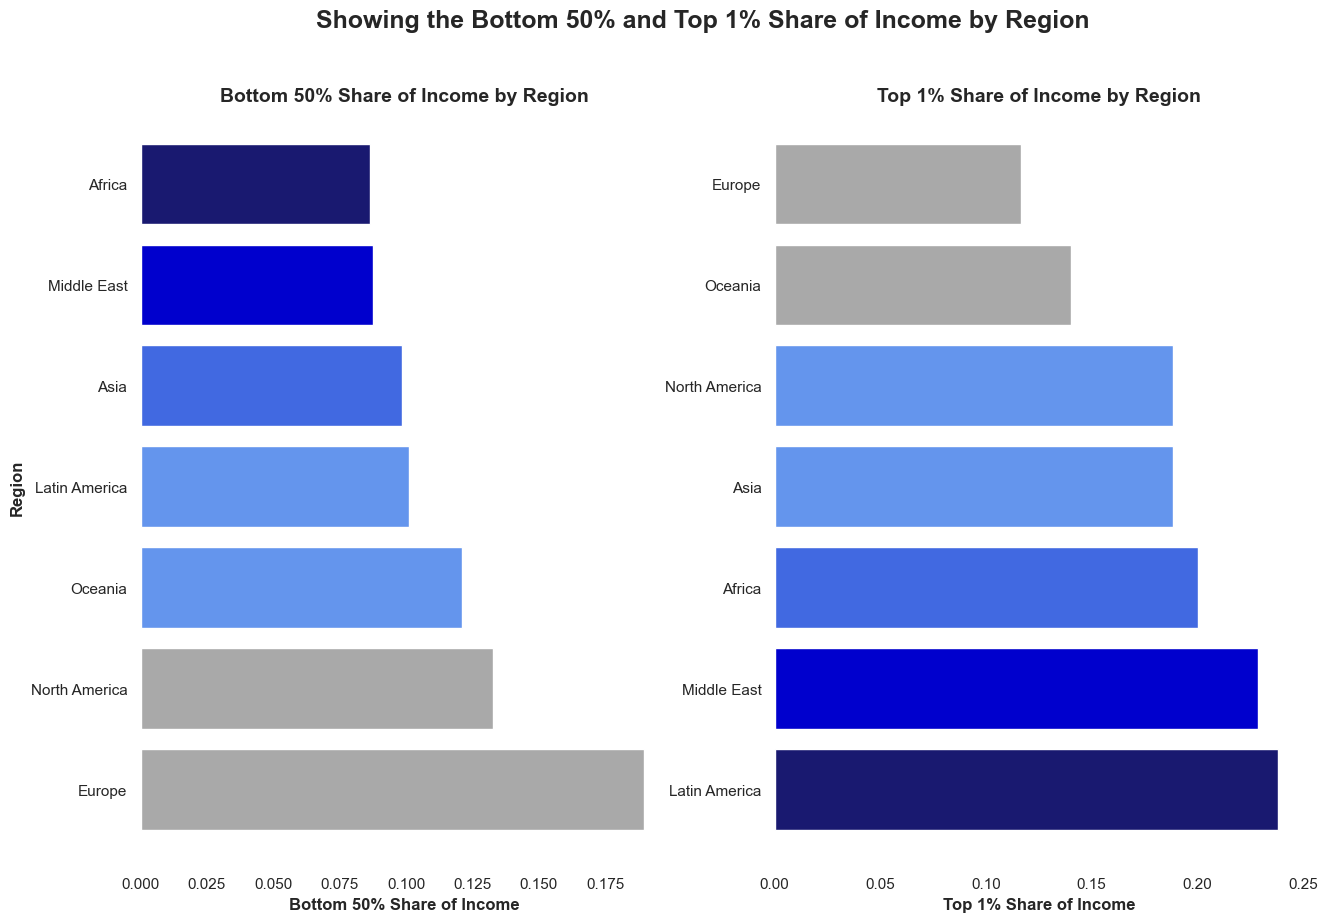

In [29]:
#Visualising the Countients Income gaps using Bar Chart
fig = plt.figure()
 
df_bottom_50per_share_income_region.sort_values(by = 'Bottom 50% share of income', 
                                                ascending = False, 
                                                inplace = True)

ax1 = plt.subplot(121)

ax1.barh(df_bottom_50per_share_income_region['Region'], 
        df_bottom_50per_share_income_region['Bottom 50% share of income'], 
         color =[ 'darkgrey',
                 'darkgrey', 
                 'cornflowerblue',
                 'cornflowerblue', 
                 'royalblue', 
                 'mediumblue', 
                 'midnightblue'])

ax1.set_xlabel('Bottom 50% Share of Income', 
               fontsize = 12, 
               fontweight = 'bold')

ax1.set_ylabel('Region', 
               fontsize = 12, 
               fontweight = 'bold')

ax1.set_title('Bottom 50% Share of Income by Region', 
              fontsize = 14, 
              fontweight = 'bold')

ax1.set_frame_on(False)

df_top_1per_share_income_region.sort_values(by = 'Top 1% share of income', ascending=False, inplace=True)

ax2 = plt.subplot(122)
ax2.barh(df_top_1per_share_income_region['Region'], 
        df_top_1per_share_income_region['Top 1% share of income'], 
         color = ['midnightblue', 
                 'mediumblue', 
                 'royalblue', 
                 'cornflowerblue',
                 'cornflowerblue', 
                 'darkgrey',
                 'darkgrey', 
                 'darkgrey', 
                 'gainsboro', 
                 'gainsboro'])

ax2.set_xlabel('Top 1% Share of Income', 
               fontsize = 12, 
               fontweight = 'bold')

ax2.set_title('Top 1% Share of Income by Region', 
              fontsize = 14, 
              fontweight = 'bold')

ax2.set_frame_on(False)

plt.suptitle('Showing the Bottom 50% and Top 1% Share of Income by Region', fontsize = 18, fontweight = 'bold')


From the bar charts it can be seen that the African continent has the lowest share of income for the bottom 50%, this is not surprise as higher levels of poverty are more prevalent. 

Text(0.5, 0.98, 'Countries With the High and Lowest GINI Coefficient')

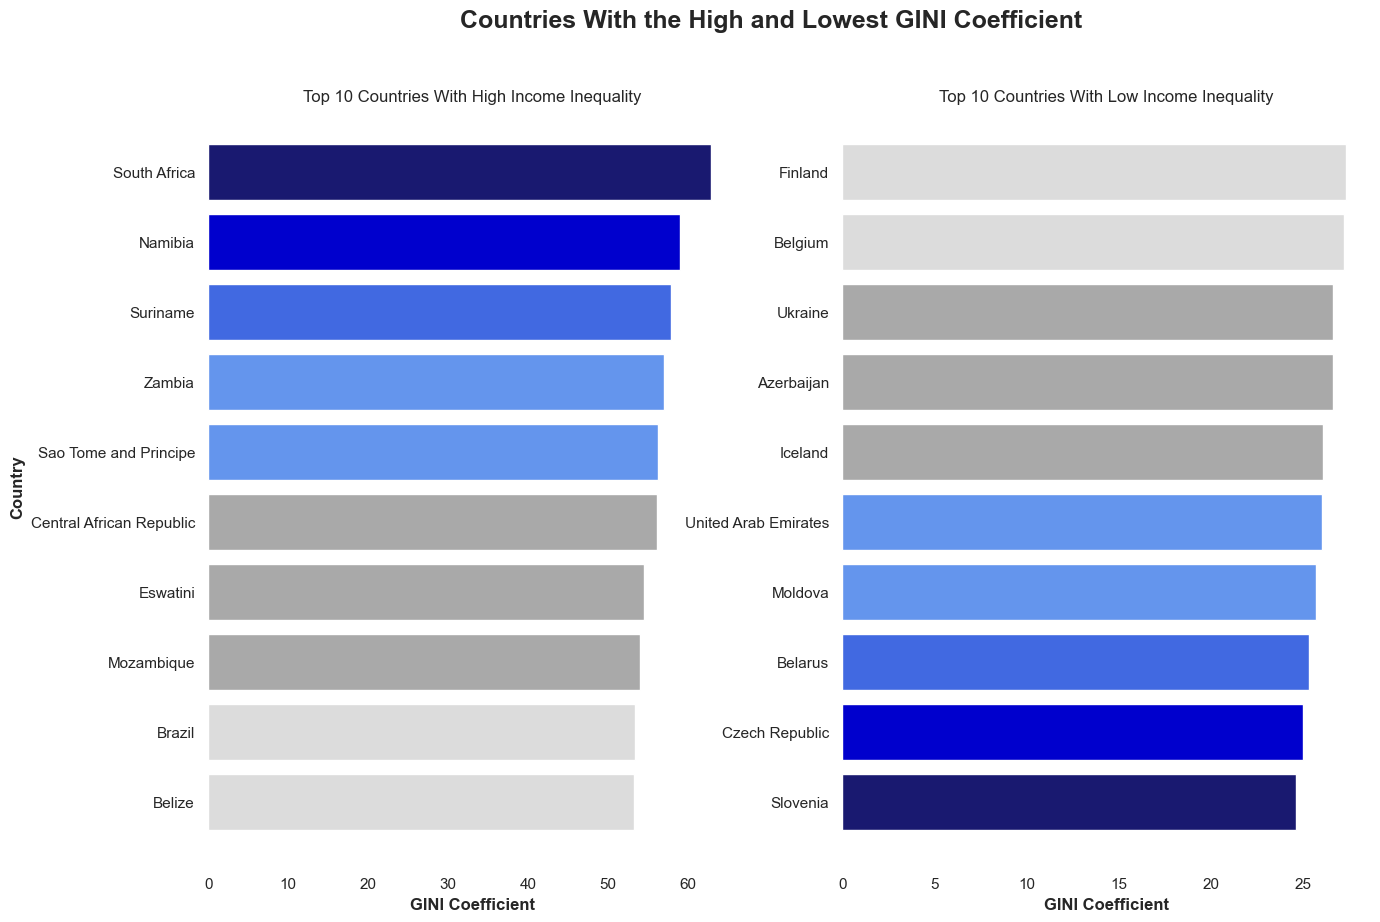

In [30]:
#Visualing the top 10 most unequal countries in the world
df_gini_coeff_sorted_10_worst = df_gini_coeff.sort_values(by = 'Gini Coefficient', ascending=True).iloc[-10:]

df_gini_coeff_sorted_10_best = df_gini_coeff.sort_values(by = 'Gini Coefficient', ascending=True).iloc[:10]

fig = plt.figure()
 
ax1 = plt.subplot(121)

ax1.barh(df_gini_coeff_sorted_10_worst['Country'], 
        df_gini_coeff_sorted_10_worst['Gini Coefficient'], 
         color =['gainsboro', 
                 'gainsboro', 
                 'darkgrey', 
                 'darkgrey',
                 'darkgrey', 
                 'cornflowerblue',
                 'cornflowerblue', 
                 'royalblue', 
                 'mediumblue', 
                 'midnightblue'])

ax1.set_xlabel('GINI Coefficient', fontsize = 12, fontweight = 'bold')

ax1.set_ylabel('Country', fontsize = 12, fontweight = 'bold')

ax1.set_title('Top 10 Countries With High Income Inequality')

ax1.set_frame_on(False)

ax2 = plt.subplot(122)

ax2.barh(df_gini_coeff_sorted_10_best['Country'], 
        df_gini_coeff_sorted_10_best['Gini Coefficient'], 
         color = ['midnightblue', 
                 'mediumblue', 
                 'royalblue', 
                 'cornflowerblue',
                 'cornflowerblue', 
                 'darkgrey',
                 'darkgrey', 
                 'darkgrey', 
                 'gainsboro', 
                 'gainsboro'])

ax2.set_title('Top 10 Countries With Low Income Inequality')

ax2.set_xlabel('GINI Coefficient', fontsize = 12, fontweight = 'bold')

ax2.set_frame_on(False)

plt.suptitle('Countries With the High and Lowest GINI Coefficient', fontsize = 18, fontweight = 'bold')

From the chart above African and South American countries make up the top ten with South Africa being the most unequal country in terms of income with a Gini Coefficient of 63%.

On the opposite spectrum European countries dominate the top ten countries with low-income inequality with Slovenia with the lowest inequality at 24.60%.


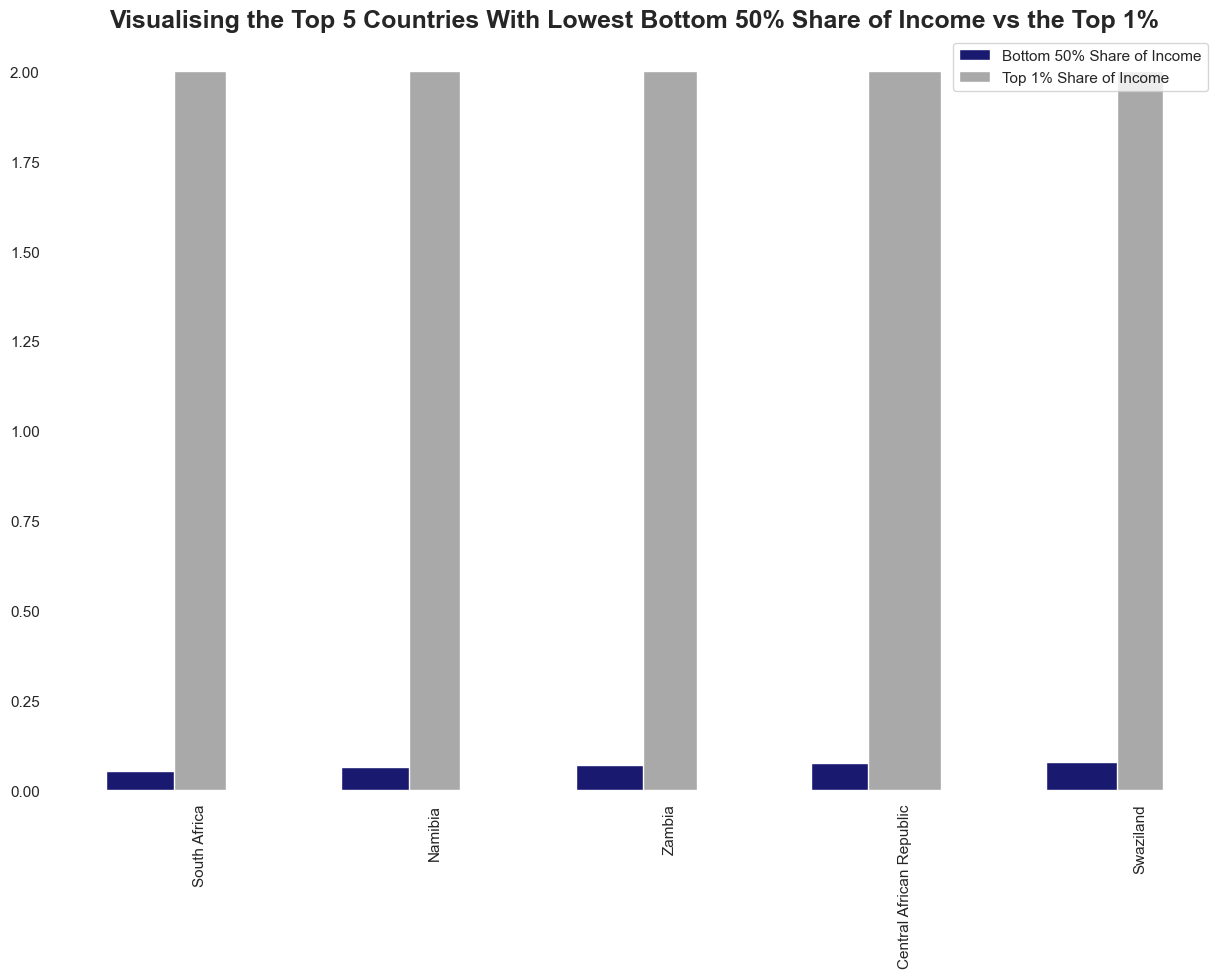

In [31]:
#Visualising the bottom 50% vs the top 1% share of income using Bar Chart
df_bottom_50_vs_top_1 = pd.merge(left = df_bottom_50per_share_income_country,
                                right = df_top_1per_share_income_country,
                                left_on = 'Country',
                                right_on = 'Country')

df_bottom_50_vs_top_1 = df_bottom_50_vs_top_1.sort_values(by = 'Bottom 50% share of income', 
                                                          ascending=True).iloc[:5]

ax = plt.gca()

Country = list(df_bottom_50_vs_top_1['Country'])
bottom_50 = list(df_bottom_50_vs_top_1['Bottom 50% share of income'])
top_1 = list(df_bottom_50_vs_top_1['Top 1% share of income'])

x_axis = np.arange(len(Country))
    
plt.bar(x_axis -0.2,
        bottom_50, 
       label = 'Bottom 50% Share of Income',
       color = 'midnightblue', 
       width=0.4)

plt.bar(x_axis +0,2,
        top_1, 
       label = 'Top 1% Share of Income',
       color = 'darkgrey')

plt.xticks(x_axis, Country)

plt.xticks(rotation = 90)

plt.title('Visualising the Top 5 Countries With Lowest Bottom 50% Share of Income vs the Top 1%', 
          fontsize = 18, 
          fontweight = 'bold')

plt.legend()

ax.set_frame_on(False)

plt.show()

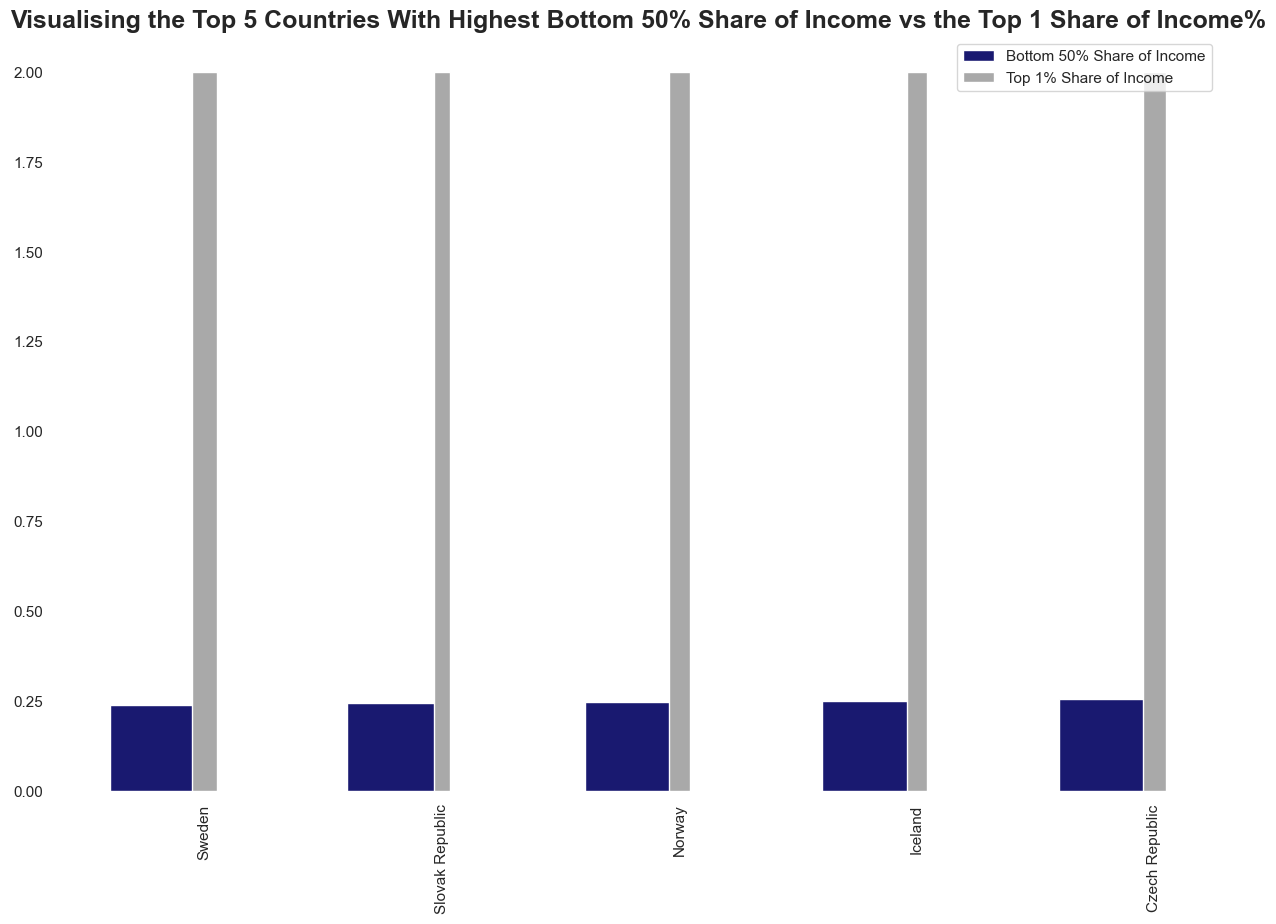

In [32]:
df_bottom_50_vs_top_1 = pd.merge(left = df_bottom_50per_share_income_country,
                                right = df_top_1per_share_income_country,
                                left_on = 'Country',
                                right_on = 'Country')

df_bottom_50_vs_top_1_2 = df_bottom_50_vs_top_1.sort_values(by = 'Bottom 50% share of income', 
                                                            ascending=True).iloc[-5:]

Country = list(df_bottom_50_vs_top_1_2['Country'])
bottom_50_2 = list(df_bottom_50_vs_top_1_2['Bottom 50% share of income'])
top_1_2 = list(df_bottom_50_vs_top_1_2['Top 1% share of income'])

ax = plt.gca()

x_axis = np.arange(len(Country))
    
plt.bar(x_axis -0.2,
        bottom_50_2, 
       label = 'Bottom 50% Share of Income',
       color = 'midnightblue', 
       width=0.4)

plt.bar(x_axis +0,2,
        top_1_2, 
       label = 'Top 1% Share of Income',
       color = 'darkgrey')

plt.xticks(x_axis, Country)

plt.xticks(rotation = 90)

plt.title('Visualising the Top 5 Countries With Highest Bottom 50% Share of Income vs the Top 1 Share of Income%', 
          fontsize = 18, 
          fontweight = 'bold')
plt.legend()

ax.set_frame_on(False)

plt.show()

From the two charts above it is evident there is a huge disparity between the bottom 50% and the top 1%.

Text(0.5, 0.98, 'Countries With the High and Lowest Gender Gap Index')

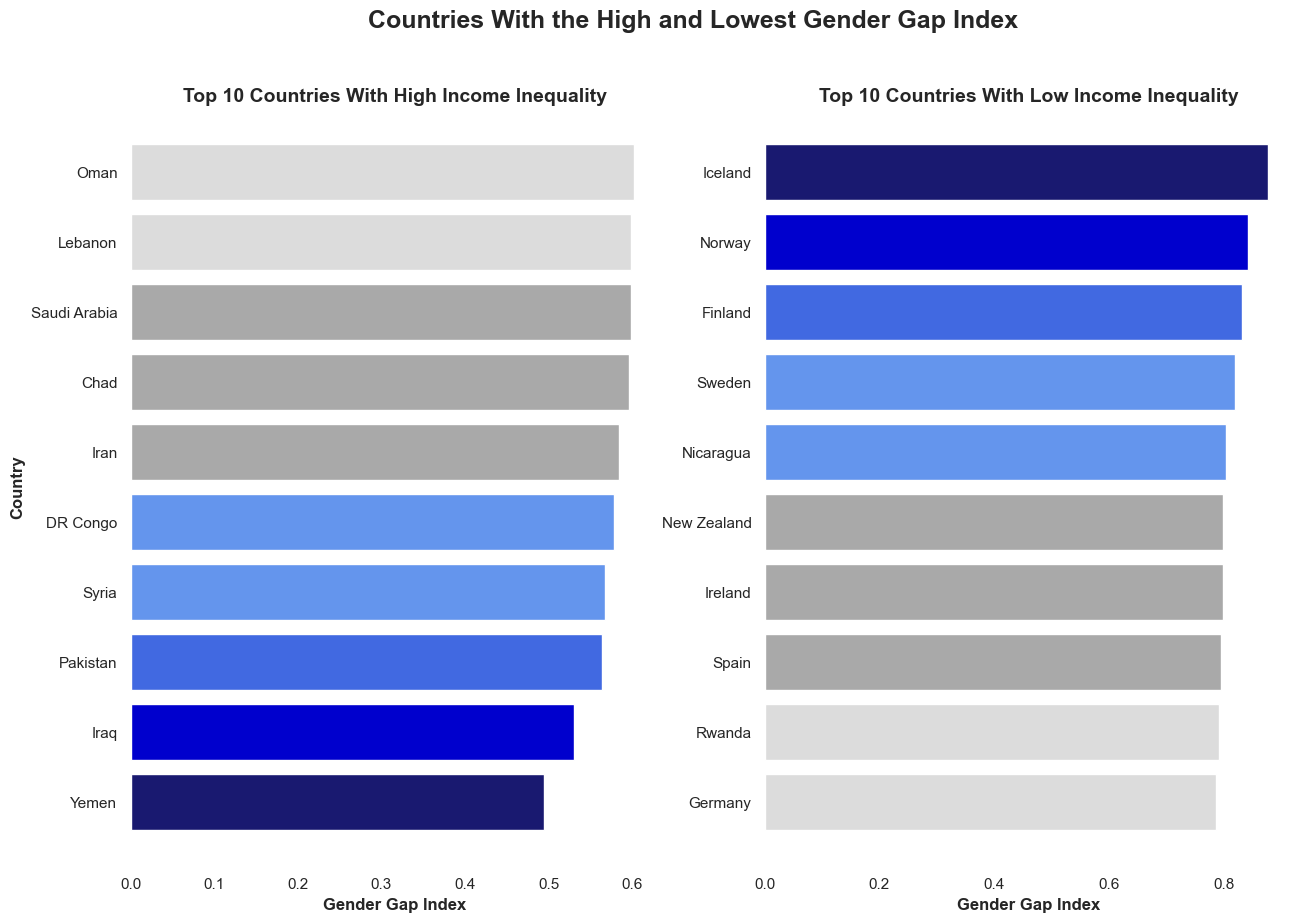

In [33]:
# Visualising Gender per country
df_gender_gap_index_worst = df_gender_gap_index.sort_values(by = 'Gender Gap Score (0-1)',
                                                            ascending=True).iloc[:10]

df_gender_gap_index_best = df_gender_gap_index.sort_values(by = 'Gender Gap Score (0-1)', 
                                                           ascending=True).iloc[-10:]


fig = plt.figure()
 
ax1 = plt.subplot(121)

ax1.barh(df_gender_gap_index_worst['Country'], 
        df_gender_gap_index_worst['Gender Gap Score (0-1)'], 
         color =['midnightblue',
                 'mediumblue',
                 'royalblue',
                 'cornflowerblue',
                 'cornflowerblue',
                 'darkgrey',
                 'darkgrey',
                 'darkgrey',
                 'gainsboro',
                 'gainsboro'])

ax1.set_xlabel('Gender Gap Index', 
               fontsize = 12, 
               fontweight = 'bold')

ax1.set_ylabel('Country', 
               fontsize = 12, 
               fontweight = 'bold')

ax1.set_title('Top 10 Countries With High Income Inequality', 
              fontsize = 14, 
              fontweight = 'bold')

ax1.set_frame_on(False)

ax2 = plt.subplot(122)

ax2.barh(df_gender_gap_index_best['Country'], 
        df_gender_gap_index_best['Gender Gap Score (0-1)'], 
         color = ['gainsboro',
                  'gainsboro',
                  'darkgrey',
                  'darkgrey',
                  'darkgrey',
                  'cornflowerblue',
                  'cornflowerblue',
                  'royalblue',
                  'mediumblue',
                  'midnightblue'])

ax2.set_title('Top 10 Countries With Low Income Inequality', 
              fontsize = 14, 
              fontweight = 'bold')

ax2.set_xlabel('Gender Gap Index', 
               fontsize = 12, 
               fontweight = 'bold')

ax2.set_frame_on(False)

plt.suptitle('Countries With the High and Lowest Gender Gap Index', fontsize = 18, fontweight = 'bold')


The Gender Gap Index quantifies the gaps between women and men in four key areas: health, education, economy, and politics.
The scores range from zero to one. A score of one indicates full equality between women and men and a score of zero indicates full inequality.


Text(0.5, 0.98, 'Countries with the High and Lowest Unemployment')

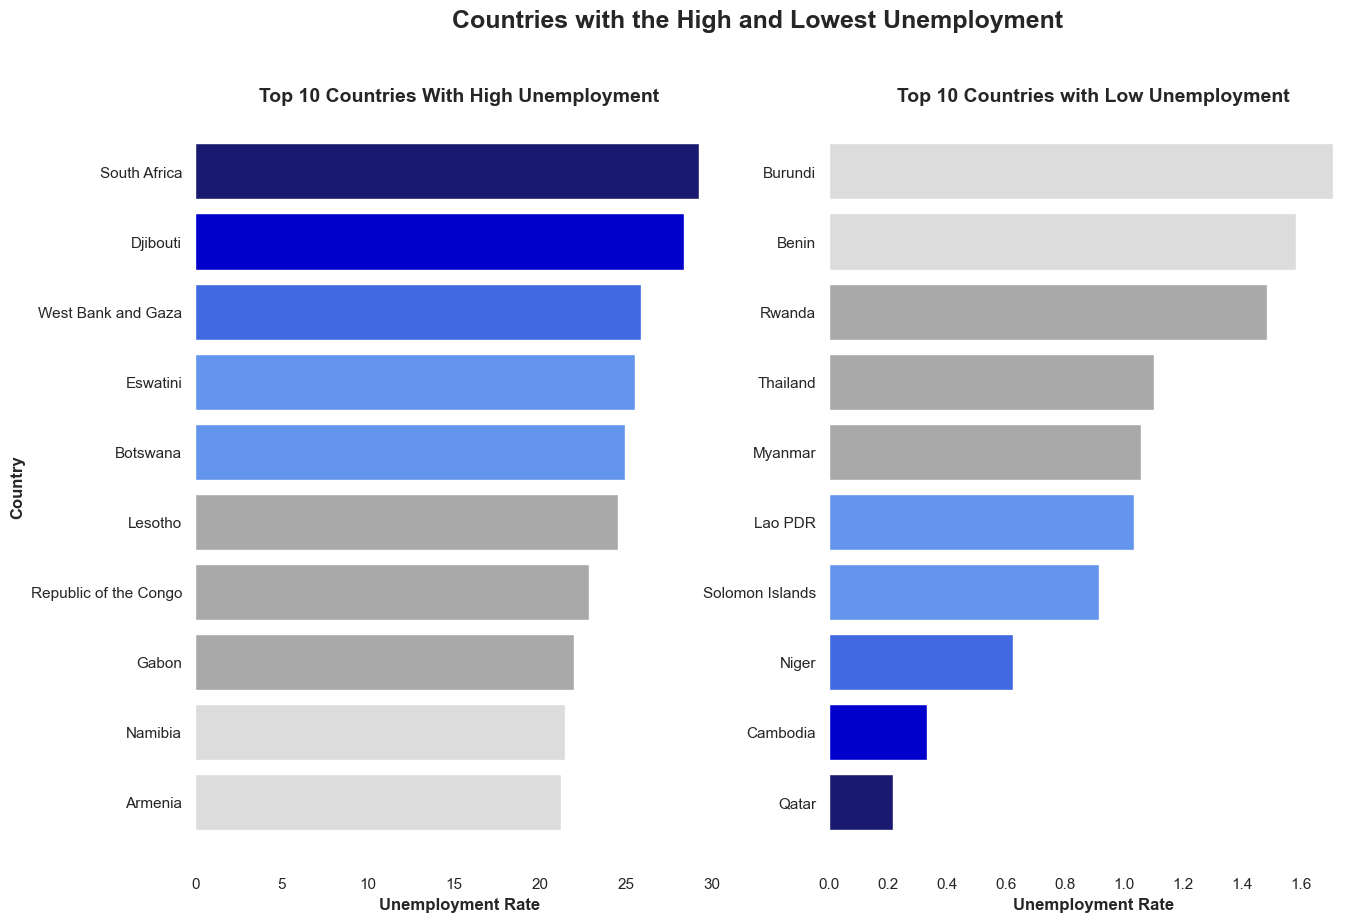

In [34]:
#Visualising Unemployment rate using Bar Chart

df_unemployment_rate_cleaned_worst = df_unemployment_rate_cleaned.sort_values(by = 'Unemployment Rate', 
                                                                              ascending=True).iloc[-10:]

df_unemployment_rate_cleaned_best = df_unemployment_rate_cleaned.sort_values(by = 'Unemployment Rate', 
                                                                             ascending=True).iloc[:10]


fig = plt.figure()
 
ax1 = plt.subplot(121)

ax1.barh(df_unemployment_rate_cleaned_worst['Country'], 
        df_unemployment_rate_cleaned_worst['Unemployment Rate'], 
         color =['gainsboro',
                 'gainsboro',
                 'darkgrey',
                 'darkgrey',
                 'darkgrey',
                 'cornflowerblue',
                 'cornflowerblue',
                 'royalblue',
                 'mediumblue',
                 'midnightblue'])

ax1.set_xlabel('Unemployment Rate', 
               fontsize = 12, 
               fontweight = 'bold')
ax1.set_ylabel('Country', 
               fontsize = 12, 
               fontweight = 'bold')

ax1.set_title('Top 10 Countries With High Unemployment',
              fontsize = 14, 
              fontweight = 'bold')

ax1.set_frame_on(False)

ax2 = plt.subplot(122)

ax2.barh(df_unemployment_rate_cleaned_best['Country'], 
        df_unemployment_rate_cleaned_best['Unemployment Rate'], 
         color = ['midnightblue',
                  'mediumblue',
                  'royalblue',
                  'cornflowerblue',
                  'cornflowerblue',
                  'darkgrey',
                  'darkgrey',
                  'darkgrey',
                  'gainsboro',
                  'gainsboro'])

ax2.set_title('Top 10 Countries with Low Unemployment', 
              fontsize = 14, 
              fontweight = 'bold')

ax2.set_xlabel('Unemployment Rate', 
               fontsize = 12, 
               fontweight = 'bold')

ax2.set_frame_on(False)

plt.suptitle('Countries with the High and Lowest Unemployment', fontsize = 18, fontweight = 'bold')


The country with the highest Gini Coefficient also has the highest unemployment in the world.

Qatar has one of the lowest unemployment rates.

Text(0.5, 0.98, 'Countries With the High and Lowest Govt Spend on Education')

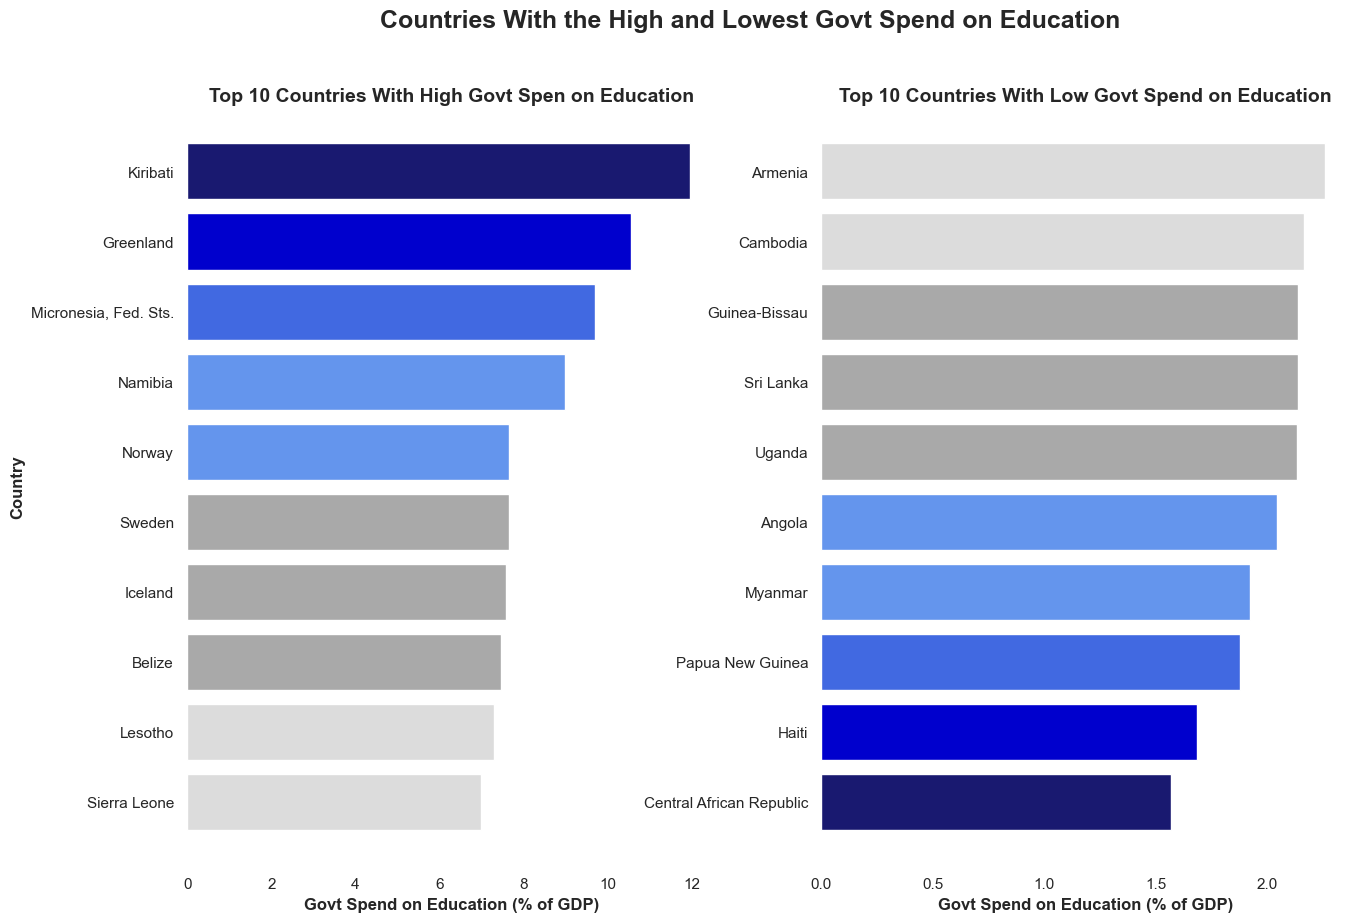

In [35]:
#Govt spend on education as a percwntage of GDP
df_govt_spend_on_edu_cleaned_worst = df_govt_spend_on_edu_cleaned.sort_values(by = 'Govt Spend on Education (% of GDP)', 
                                                                              ascending=True).iloc[-10:]

df_govt_spend_on_edu_cleaned_best = df_govt_spend_on_edu_cleaned.sort_values(by = 'Govt Spend on Education (% of GDP)', 
                                                                             ascending=True).iloc[:10]


fig = plt.figure()
 
ax1 = plt.subplot(121)

ax1.barh(df_govt_spend_on_edu_cleaned_worst['Country'], 
         df_govt_spend_on_edu_cleaned_worst['Govt Spend on Education (% of GDP)'], 
         color =['gainsboro',
                 'gainsboro',
                 'darkgrey',
                 'darkgrey',
                 'darkgrey',
                 'cornflowerblue',
                 'cornflowerblue',
                 'royalblue',
                 'mediumblue',
                 'midnightblue'])

ax1.set_xlabel('Govt Spend on Education (% of GDP)', 
               fontsize = 12, fontweight = 'bold')
ax1.set_ylabel('Country', fontsize = 12, 
               fontweight = 'bold')
ax1.set_title('Top 10 Countries With High Govt Spen on Education', 
              fontsize = 14, 
              fontweight = 'bold')

ax1.set_frame_on(False)

ax2 = plt.subplot(122)

ax2.barh(df_govt_spend_on_edu_cleaned_best['Country'], 
        df_govt_spend_on_edu_cleaned_best['Govt Spend on Education (% of GDP)'], 
         color = ['midnightblue',
                  'mediumblue',
                  'royalblue',
                  'cornflowerblue',
                  'cornflowerblue',
                  'darkgrey',
                  'darkgrey',
                  'darkgrey',
                  'gainsboro',
                  'gainsboro'])

ax2.set_title('Top 10 Countries With Low Govt Spend on Education', 
              fontsize = 14, 
              fontweight = 'bold')
ax2.set_xlabel('Govt Spend on Education (% of GDP)', 
               fontsize = 12, 
               fontweight = 'bold')

ax2.set_frame_on(False)

plt.suptitle('Countries With the High and Lowest Govt Spend on Education', fontsize = 18, fontweight = 'bold')


When it comes to public spending on education the top ten list of countries is diverse as there are African, European and Oceania Nations in the list. With Kiribati, a country in Oceania topping the list.

The Central African Republic spends the least relative to the country's GDP.



Text(0.5, 0.98, 'Countries With the High and Lowest Levels of Corruption')

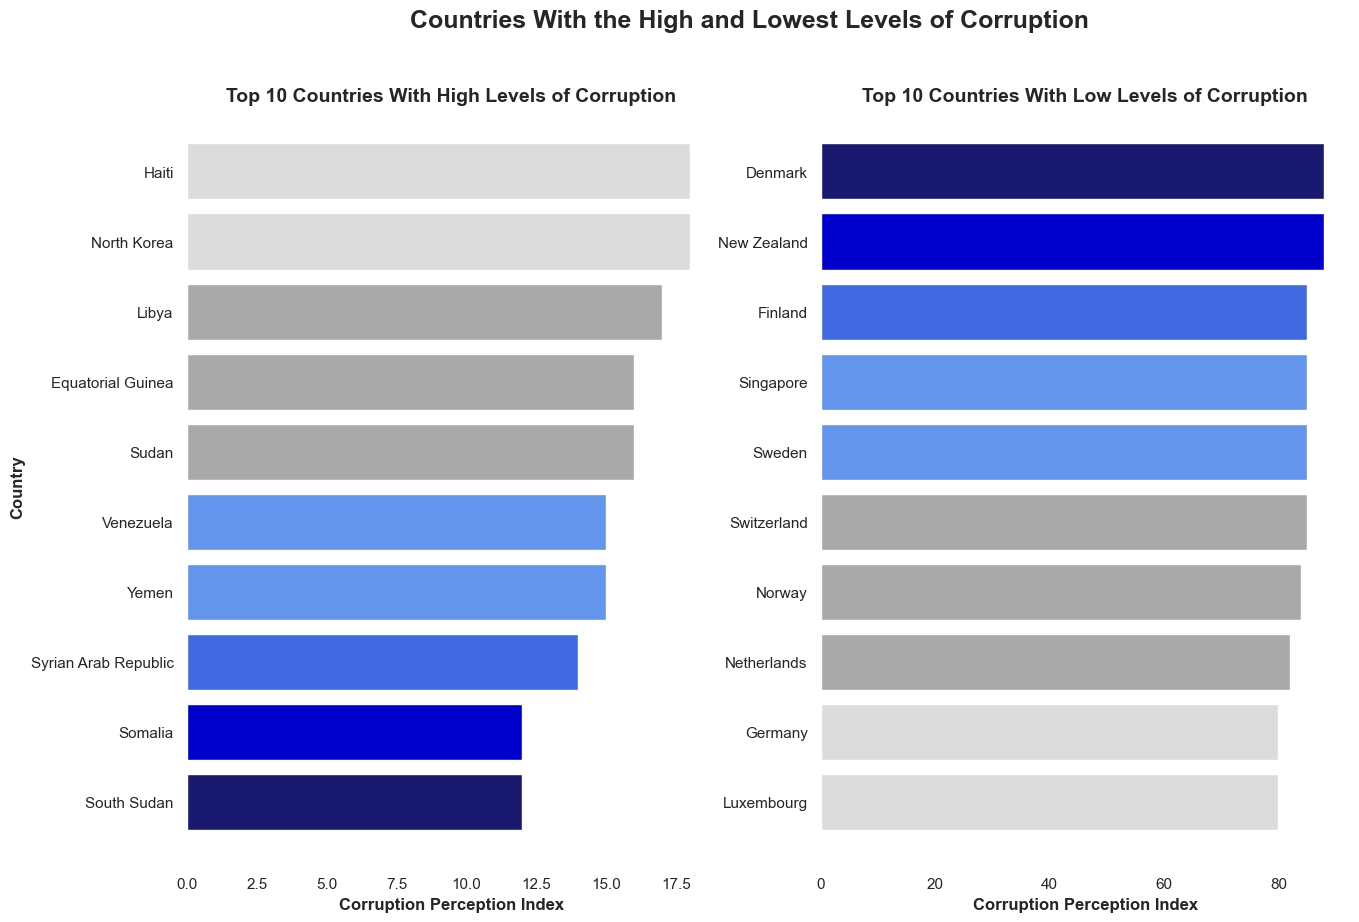

In [36]:
#Visualising Corruption Perception Index
df_cpi_per_country_worst = df_cpi_per_country.sort_values(by = 'CPI Score', 
                                                          ascending=True).iloc[:10]

df_cpi_per_country_best = df_cpi_per_country.sort_values(by = 'CPI Score', 
                                                         ascending=True).iloc[-10:]


fig = plt.figure()
 
ax1 = plt.subplot(121)

ax1.barh(df_cpi_per_country_worst['Country'], 
         df_cpi_per_country_worst['CPI Score'], 
         color =['midnightblue',
                  'mediumblue',
                  'royalblue',
                  'cornflowerblue',
                  'cornflowerblue',
                  'darkgrey',
                  'darkgrey',
                  'darkgrey',
                  'gainsboro',
                  'gainsboro'])

ax1.set_xlabel('Corruption Perception Index', 
               fontsize = 12, fontweight = 'bold')
ax1.set_ylabel('Country', fontsize = 12, 
               fontweight = 'bold')
ax1.set_title('Top 10 Countries With High Levels of Corruption', 
              fontsize = 14, 
              fontweight = 'bold')

ax1.set_frame_on(False)

ax2 = plt.subplot(122)

ax2.barh(df_cpi_per_country_best['Country'], 
        df_cpi_per_country_best['CPI Score'], 
         color = ['gainsboro',
                 'gainsboro',
                 'darkgrey',
                 'darkgrey',
                 'darkgrey',
                 'cornflowerblue',
                 'cornflowerblue',
                 'royalblue',
                 'mediumblue',
                 'midnightblue'])

ax2.set_title('Top 10 Countries With Low Levels of Corruption', 
              fontsize = 14, 
              fontweight = 'bold')
ax2.set_xlabel('Corruption Perception Index', 
               fontsize = 12, 
               fontweight = 'bold')

ax2.set_frame_on(False)

plt.suptitle('Countries With the High and Lowest Levels of Corruption', fontsize = 18, fontweight = 'bold')


The Lower the CPI the more corrupt a nation is. From the chart, South Sudan is the most corrupt country in the top ten.

European countries make the top ten as the least corrupt nations in the world.


Text(0.5, 1.0, 'Govt Spend on Education (% of GDP)')

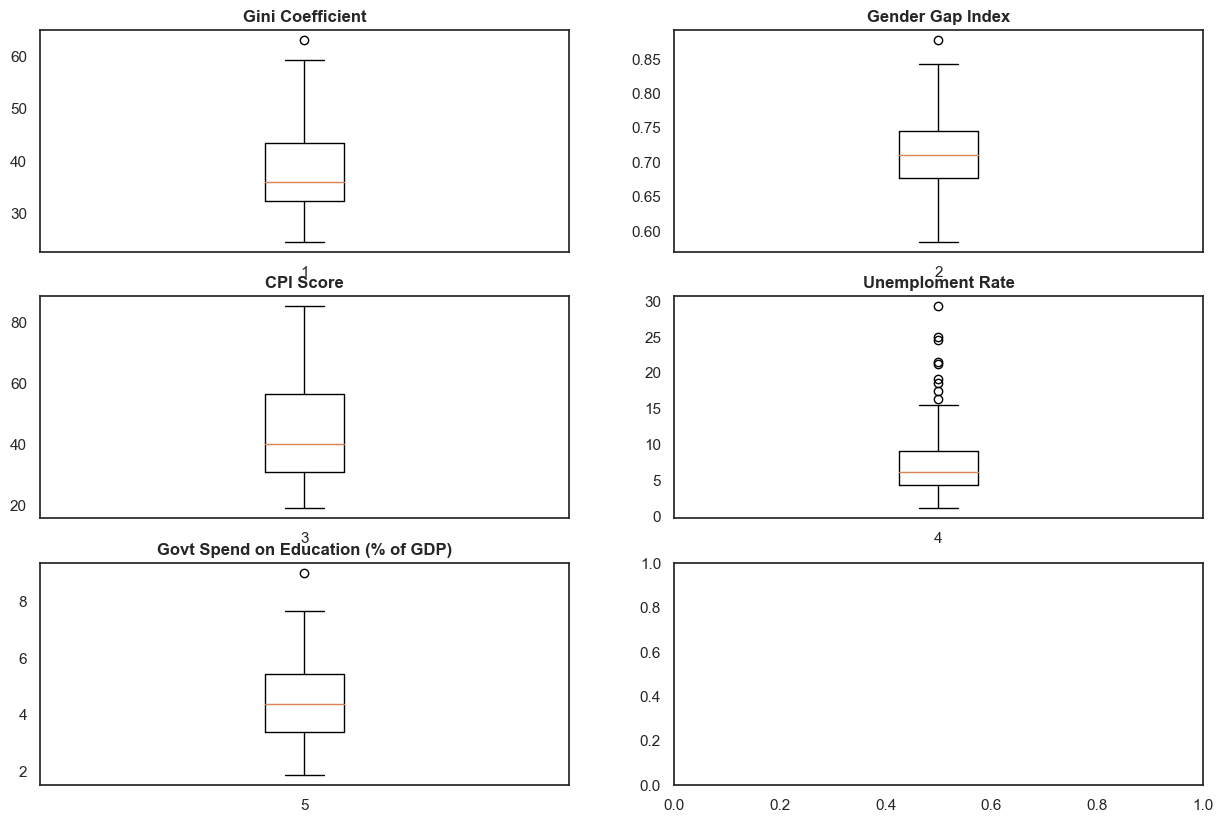

In [37]:
fig, axs = plt.subplots(3,2)

axs[0,0].boxplot('Gini Coefficient', 
                 labels = '1',
                 data = df_main_final)
axs[0,0].set_title('Gini Coefficient',
                   fontsize = 12, 
                   fontweight = 'bold')

axs[0,1].boxplot('Gender Gap Score (0-1)',  
                 labels = '2',
                 data = df_main_final)
axs[0,1].set_title('Gender Gap Index',
                   fontsize = 12, 
                   fontweight = 'bold')

axs[1,0].boxplot('CPI Score',  
                 labels = '3',
                 data = df_main_final)
axs[1,0].set_title('CPI Score',
                   fontsize = 12, 
                   fontweight = 'bold')

axs[1,1].boxplot('Unemployment Rate', 
                 labels = '4',
                 data = df_main_final)
axs[1,1].set_title('Unemploment Rate',
                   fontsize = 12, 
                   fontweight = 'bold')

axs[2,0].boxplot('Govt Spend on Education (% of GDP)', labels = '5',data = df_main_final)
axs[2,0].set_title('Govt Spend on Education (% of GDP)',
                   fontsize = 12, 
                   fontweight = 'bold')

From the boxplots above the unemployment rate has multiple outliers, this will potentially affect the regression model. Gender Gap Index and Govt Spend on GDP has a couple of outliers present as well.

In [38]:
#Standardising data frame
df = df_main_final.drop(columns='Country', 
                        axis = 1) #droping the Country column

scalar = MinMaxScaler()
scalar.fit(df)
scaled = scalar.fit_transform(df)
df_main_final_scaled = pd.DataFrame(scaled, 
                                    columns=df.columns)

df_main_final_scaled.head()

,Gini Coefficient,Bottom 50% share of income,Top 1% share of income,Gender Gap Score (0-1),Gender Gap Rank,CPI Score,CPI Rank,Unemployment Rate,Govt Spend on Education (% of GDP)
0,1.00,0.00,0.62,0.67,0.11,0.38,0.41,1.00,0.60
1,0.90,0.06,0.61,0.68,0.07,0.48,0.33,0.72,1.00
2,0.87,0.36,0.52,0.42,0.52,0.29,0.56,0.31,0.54
3,0.85,0.08,0.67,0.50,0.30,0.21,0.70,0.42,0.40
4,0.77,0.15,1.00,0.47,0.37,0.09,0.90,0.10,0.50


<AxesSubplot:>

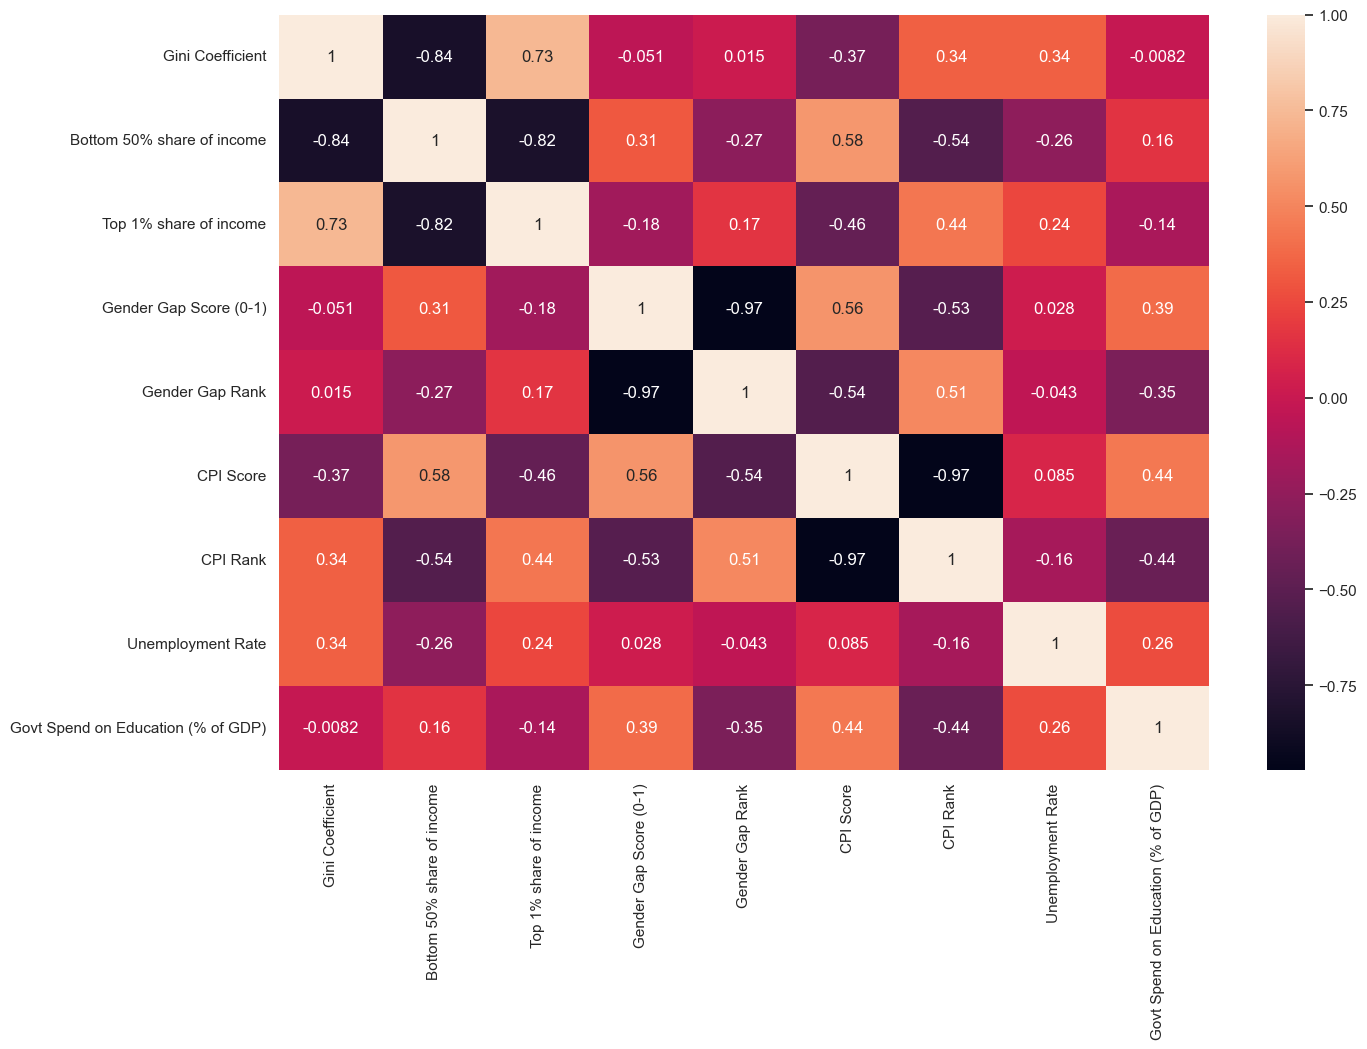

In [39]:
#Visualising the correlation heatmap of the variables
sns.heatmap(df_main_final_scaled.corr(),  
            annot=True)

Text(0.5, 1.0, 'Gini Coefficient vs Govt Spend on Education (% of GDP)')

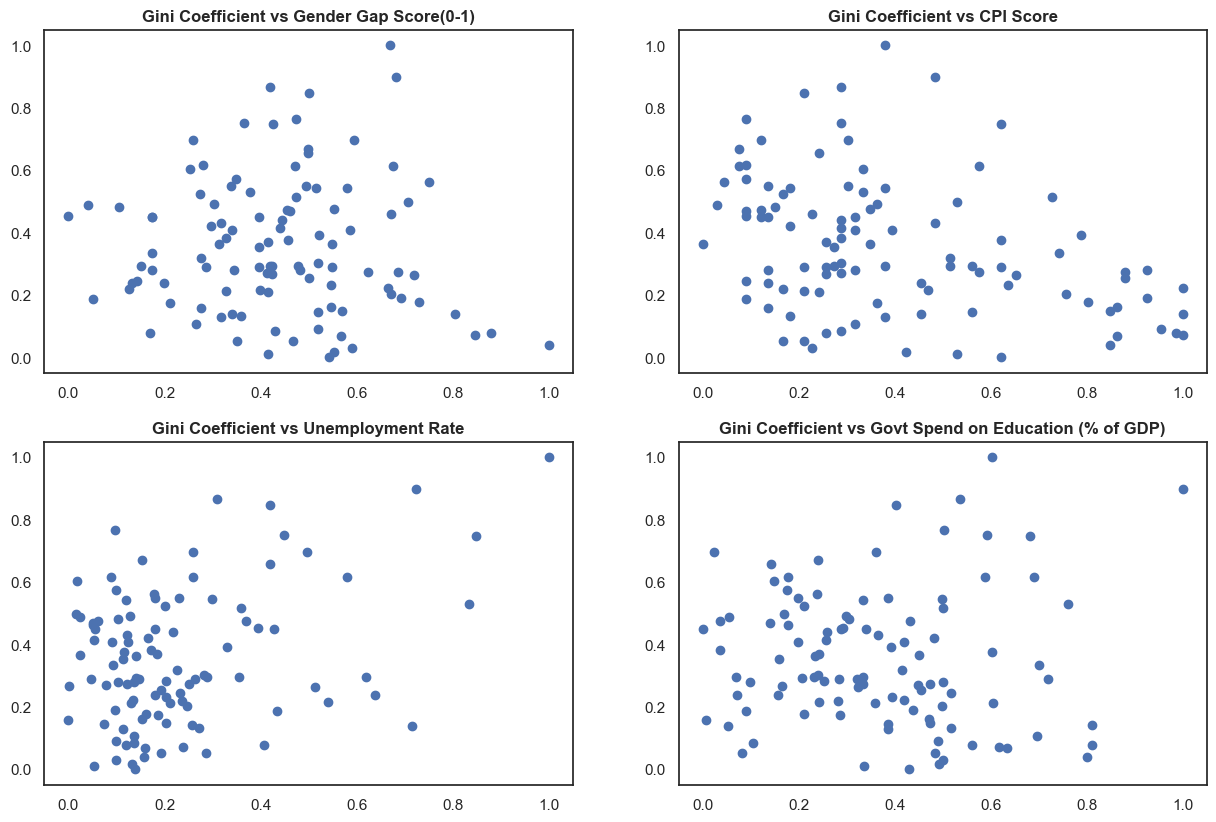

In [40]:
#Vis
fig, axs = plt.subplots(2,2)

axs[0,0].scatter('Gender Gap Score (0-1)', 
                 'Gini Coefficient', 
                 data = df_main_final_scaled)
axs[0,0].set_title('Gini Coefficient vs Gender Gap Score(0-1)', 
                   fontsize = 12, 
                   fontweight = 'bold')

axs[0,1].scatter('CPI Score', 
                 'Gini Coefficient', 
                 data = df_main_final_scaled)
axs[0,1].set_title('Gini Coefficient vs CPI Score',
                   fontsize = 12, 
                   fontweight = 'bold')

axs[1,0].scatter('Unemployment Rate', 
                 'Gini Coefficient', 
                 data = df_main_final_scaled)
axs[1,0].set_title('Gini Coefficient vs Unemployment Rate',
                   fontsize = 12, 
                   fontweight = 'bold')

axs[1,1].scatter('Govt Spend on Education (% of GDP)', 
                 'Gini Coefficient', 
                 data = df_main_final_scaled)
axs[1,1].set_title('Gini Coefficient vs Govt Spend on Education (% of GDP)',
                   fontsize = 12, 
                   fontweight = 'bold')


# Linear Regression

In [41]:
#Creating the independent and dependent variables    
x = df_main_final_scaled.drop(labels=['Gini Coefficient',                         
                         'Bottom 50% share of income', 
                         'Top 1% share of income', 
                         'Gender Gap Rank', 
                         'CPI Rank'], axis = 1)                    #There will be 4 independent variables

y = df_main_final_scaled['Gini Coefficient']

#Convert to numpy 
x_num = x.to_numpy()
y_num = y.to_numpy()

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_num, y_num, test_size= 0.20, random_state=40)

In [43]:
model = LinearRegression()

In [44]:
model.fit(x_train, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(x_test)
y_pred

array([0.40350722, 0.27870999, 0.25285579, 0.37204912, 0.3339873 ,
       0.31574372, 0.35967219, 0.40479974, 0.26565667, 0.36792566,
       0.2387547 , 0.32668315, 0.4366933 , 0.30032402, 0.39921533,
       0.42611991, 0.30202026, 0.38103313, 0.4933002 , 0.4445723 ,
       0.21387107])

In [46]:
#Model coefficients
model.coef_

array([ 0.30839334, -0.38250666,  0.4691608 ,  0.1180752 ])

In [47]:
#Coefficient of determination
model.score(x_train, y_train)

0.3630141961145671

The coefficient of determination is a statistical measurement that examines how differences in one variable can be explained by the difference in a second variable when predicting the outcome of a given event.

In this case, the R^2 is 36.30% meaning that 36.30 per cent of the variation in the Gini Coefficient is explained by the independent variables.


In [48]:
#Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.21754045639408431

RMSE is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are.


This measures the accuracy of our model in making predictions. The RMSE is low in this case and the model is about (1-0.2175) 78.25% accurate in predicting the model.
